Nous allons étudié les relations entre les différents paramètres des séismes et l'évolution de leur fréquence.

On récupère les données nettoyées.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("donnee_propres")

In [2]:
df.head()

,ID Earthquake,Flag Tsunami,Year,Focal Depth,Intensity,Country,EQ Primary,Total Effects : Houses Destroyed,Total Effects : Damages in million Dollars,Total Effects : Deaths,Coordinates
0,78,NaN,334,NaN,10.0,ALBANIA,NaN,NaN,NaN,NaN,"41.2, 19.3"
1,84,Tsunami,344,NaN,9.0,TURKEY,NaN,NaN,NaN,NaN,"40.3, 26.5"
2,9989,Tsunami,346,NaN,9.0,ALBANIA,6.8,NaN,NaN,NaN,"41.4, 19.4"
3,110,NaN,438,NaN,10.0,GREECE,NaN,NaN,NaN,NaN,"35.5, 25.5"
4,9971,Tsunami,557,NaN,9.0,TURKEY,7.0,NaN,NaN,NaN,"40.9, 27.6"


In [3]:
df2=df[["Year","EQ Primary"]]
df2=df2[df2["EQ Primary"].isna()==False]

On supprime les valeurs non indiquées pour pouvoir tracer les courbes qui nous intéresse

<Axes: xlabel='Year'>

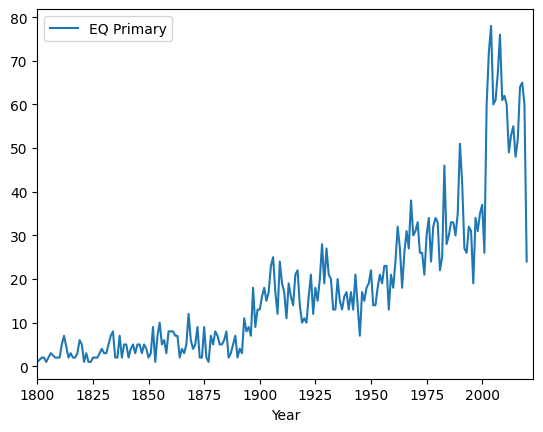

In [4]:
df2.groupby(['Year']).count().plot(xlim=[1800,2023])

On constate une hausse du nombre séisme annuellement ce qui peut paraitre étonnant à première vue. Une seconde analyse explique ce phénomène.

<Axes: xlabel='Year'>

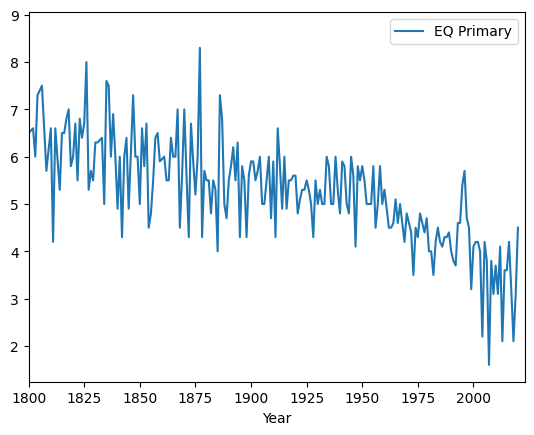

In [5]:
df2.groupby(['Year']).min().plot(xlim=[1800,2023])

On constate qu'en réalité probablement le nombre de séisme n'augmente pas mais plutôt que l'on prend en compte des séismes de magnitude de plus en plus faible

On va maintenant étudier l'effet de la présence d'une alerte au tsunami sur la destruction induite par le séisme

In [6]:
df4=df[["Year","Flag Tsunami","Total Effects : Houses Destroyed"]]
df4=df4[df4["Total Effects : Houses Destroyed"].isna()==False]
df4=df4.fillna("NT")

In [7]:
df4[["Flag Tsunami","Total Effects : Houses Destroyed"]].groupby(['Flag Tsunami']).describe()

Total Effects : Houses Destroyed                               \
                                        count          mean            std   
Flag Tsunami                                                                 
NT                                      609.0  11207.159278   54976.748638   
Tsunami                                 208.0  38641.687500  374883.482432   

                                                    
              min   25%    50%      75%        max  
Flag Tsunami                                        
NT            1.0  60.0  500.0  3487.00   959000.0  
Tsunami       1.0  78.0  800.0  4340.25  5360000.0

On constate effectivement une destruction plus importante quel que soit le quartile considéré. On remarque en particulier l'effet sur le maximum qui conduit à des destructions 5 fois plus importantes

In [8]:
df8=df[["Year","Country"]]
df8=df8.groupby(["Country"]).min()
df8.sort_values(by='Year').sort_values(by='Year', ascending=False).head(30)

,Year
Country,
COMOROS,2018
MADAGASCAR,2017
CZECH REPUBLIC,2008
MOZAMBIQUE,2006
BURUNDI,2004
SAUDI ARABIA,2004
POLAND,2004
BHUTAN,2003
RWANDA,2002


On constate que parmi les pays qui ont été touché par un séisme pour la première fois dans l'histoire récente se trouve un certains nombre de pays et de régions qui extraient des énergies fossiles dans leurs sous-sol: SAUDI ARABIA, BERING SEA,NETHERLANDS par exemple. On pourrait expliquer ce phénomène par l'existence de séismes induits.

<Axes: xlabel='Focal Depth', ylabel='EQ Primary'>

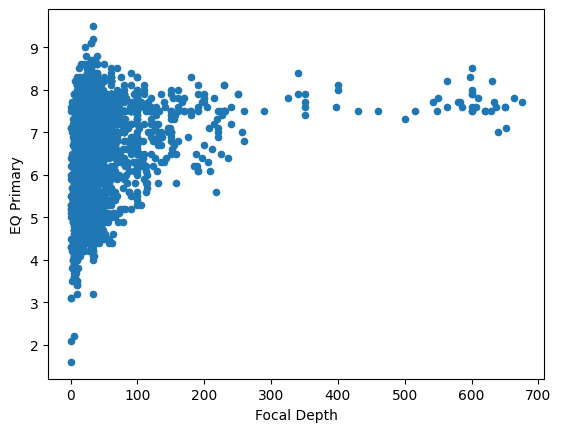

In [9]:
df90=df[["Focal Depth","EQ Primary"]]
df90=df90[df90["Focal Depth"].isna()==False]
df90=df90[df90["EQ Primary"].isna()==False]
df90.plot(x='Focal Depth',y="EQ Primary",kind='scatter')

On constate qu'à faible profondeur les séismes ont une intensité très variables, au contraire les séismes de profondeur supérieure à 150 km ont systématiquement une magnitude très importante.

Nous avons également affiché sur une carte (avec clusters) les différents points où ont eu lieu un séisme. Voici le code:

In [10]:
import numpy as np
import pandas as pd
import folium
from folium.plugins import MarkerCluster

In [11]:
df = pd.read_csv("significant-earthquake-database.csv", sep = ";")

In [16]:
map = folium.Map()
liste_pays = df['Country'].unique()
for pays in liste_pays:
    cluster = MarkerCluster().add_to(map)
    for element in df[df['Country']==pays]["Coordinates"].dropna():
        coordonnees = element.split(',')
        coordonnees[0], coordonnees[1] = float(coordonnees[0]), float(coordonnees[1])
        folium.Marker(coordonnees).add_to(cluster)
map